In [1]:
#%matplotlib notebook

In [2]:
#importing libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import linregress

In [63]:
#how many covid cases have we gone through?
covid = pd.read_csv("Data/weeklycovid.csv")
covid.head()

,week,weekending,Spec Tested,% Pos,% positive,Positive,Total Pos Cases
0,10,7-Mar,8320,11.8,0.118,982,982
1,11,14-Mar,38482,9.5,0.095,3656,4638
2,12,21-Mar,89991,9.0,0.090,8099,12737
3,13,28-Mar,112188,13.0,0.130,14584,27321
4,14,4-Apr,663328,22.0,0.220,145932,173253


In [4]:
#isolate the week numbers and the number of people tested that week
covid = covid[["week","Spec Tested"]]
covid.head()

,week,Spec Tested
0,10,8320
1,11,38482
2,12,89991
3,13,112188
4,14,663328


In [60]:
#importing console sales data for 2020
games20 = pd.read_csv("Data/consolesales.csv")
games20.head()

,week,weekending,Switch,PS4,Xbox 1,PS5,XboxXS,month,Switch.1,PS4.1,Xbox 1.1,PS5.1,XboxXS.1
0,1,4-Jan,140734,66076,58131,NaN,NaN,January,430118.0,196176.0,149249.0,NaN,NaN
1,2,11-Jan,106199,47115,31751,NaN,NaN,February,475769.0,247614.0,170003.0,NaN,NaN
2,3,18-Jan,94798,42145,30057,NaN,NaN,March,550541.0,153916.0,119480.0,NaN,NaN
3,4,25-Jan,88387,40840,29310,NaN,NaN,April,403756.0,243486.0,136264.0,NaN,NaN
4,5,1-Feb,88193,43714,27554,NaN,NaN,May,643116.0,316025.0,232599.0,NaN,NaN


In [61]:
#cutting the data from week 10 and on to match the covid data
games20c = games20[["week", "weekending", "Switch", "PS4", "Xbox 1", "PS5", "XboxXS"]]
games20c = games20c[9:51]
games20c.head()

,week,weekending,Switch,PS4,Xbox 1,PS5,XboxXS
9,10,7-Mar,85547,41354,32076,NaN,NaN
10,11,14-Mar,81541,37817,29345,NaN,NaN
11,12,21-Mar,231156,34841,27810,NaN,NaN
12,13,28-Mar,152297,39904,30249,NaN,NaN
13,14,4-Apr,132523,47071,33096,NaN,NaN


In [62]:
#a dataframe with console sales done monthly
games202 = games20[["month", "Switch.1", "PS4.1", "Xbox 1.1", "PS5.1", "XboxXS.1"]]
games202 = games202[0:12]
games202.head()

,month,Switch.1,PS4.1,Xbox 1.1,PS5.1,XboxXS.1
0,January,430118.0,196176.0,149249.0,NaN,NaN
1,February,475769.0,247614.0,170003.0,NaN,NaN
2,March,550541.0,153916.0,119480.0,NaN,NaN
3,April,403756.0,243486.0,136264.0,NaN,NaN
4,May,643116.0,316025.0,232599.0,NaN,NaN


In [8]:
#console sales data for 2019
games19 = pd.read_csv("Data/consolesales2019.csv")
games19.head()

,week,weekending,Switch,PS4,Xbox 1,month,Switch.1,PS4.1,Xbox 1.1
0,26,29-Jun,104728,46050,28320,July,331226.0,196706.0,106425.0
1,27,6-Jul,86648,44940,25825,August,384991.0,272081.0,133817.0
2,28,13-Jul,83028,48312,25050,September,533048.0,247519.0,138941.0
3,29,20-Jul,83659,52802,28154,October,177938.0,264060.0,138274.0
4,30,27-Jul,77891,50652,27396,November,1765392.0,1221499.0,1011929.0


In [9]:
#monthly sales data for 2019
games19 = games19[["month", "Switch.1", "PS4.1", "Xbox 1.1"]]
games19 = games19.iloc[0:6]
games19

,month,Switch.1,PS4.1,Xbox 1.1
0,July,331226.0,196706.0,106425.0
1,August,384991.0,272081.0,133817.0
2,September,533048.0,247519.0,138941.0
3,October,177938.0,264060.0,138274.0
4,November,1765392.0,1221499.0,1011929.0
5,December,2084530.0,808123.0,759234.0


In [10]:
#meant to count through the rows and make a list consisting of the counts
#yes2 refers to 2019 and yes refers to 2020
yes2 = []
yes2l = []
yes = []
yesl = []
for i in games20["month"]:
    str(i)
    yes.append(i)
yes
for i in range(len(yes)):
    yesl.append(i)
for i in games19["month"]:
    str(i)
    yes2.append(i)
for i in range(len(yes2)):
    yes2l.append(i)

<Figure size 720x720 with 0 Axes>

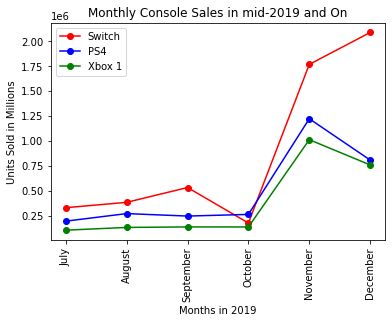

<Figure size 720x720 with 0 Axes>

In [24]:
#plotting the console sales for mid-2019 and on
plt.title("Monthly Console Sales in mid-2019 and On")
plt.xticks(yes2l, yes2, rotation = 'vertical')
plt.xlabel("Months in 2019")
plt.ylabel("Units Sold in Millions")
Switch, = plt.plot(games19["month"], games19["Switch.1"], color="red", label="Switch", marker="o")
PS4, = plt.plot(games19["month"], games19["PS4.1"], color="blue", label="PS4", marker="o")
Xbone, = plt.plot(games19["month"], games19["Xbox 1.1"], color="green", label="Xbox 1", marker="o")
plt.legend(handles = [Switch, PS4, Xbone,],loc="upper left")
plt.savefig("salesmid2019on.png")
plt.figure(figsize=(10,10))

<Figure size 720x720 with 0 Axes>

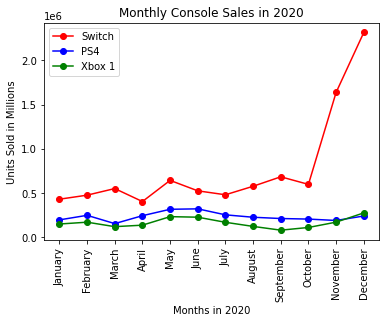

<Figure size 720x720 with 0 Axes>

In [12]:
#plotting the console sales for 2020
plt.title("Monthly Console Sales in 2020")
plt.xticks(yesl, yes, rotation = 'vertical')
plt.xlabel("Months in 2020")
plt.ylabel("Units Sold in Millions")
Switch, = plt.plot(games202["month"], games202["Switch.1"], color="red", label="Switch", marker="o")
PS4, = plt.plot(games202["month"], games202["PS4.1"], color="blue", label="PS4", marker="o")
Xbone, = plt.plot(games202["month"], games202["Xbox 1.1"], color="green", label="Xbox 1", marker="o")
plt.legend(handles = [Switch, PS4, Xbone,],loc="upper left")
plt.savefig("sales2020.png")
plt.figure(figsize=(10, 10))

<Figure size 720x720 with 0 Axes>

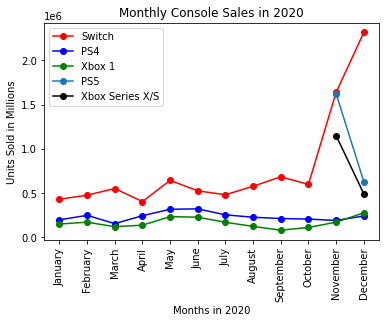

<Figure size 720x720 with 0 Axes>

In [25]:
#2020, but with the addtion of the PS5 and Xbox Series consoles
plt.title("Monthly Console Sales in 2020")
plt.xticks(yesl, yes, rotation = 'vertical')
plt.xlabel("Months in 2020")
plt.ylabel("Units Sold in Millions")
Switch, = plt.plot(games202["month"], games202["Switch.1"], color="red", label="Switch", marker="o")
PS4, = plt.plot(games202["month"], games202["PS4.1"], color="blue", label="PS4", marker="o")
Xbone, = plt.plot(games202["month"], games202["Xbox 1.1"], color="green", label="Xbox 1", marker="o")
PS5, = plt.plot(games202["month"], games202["PS5.1"], label="PS5", marker="o")
XboxXS, = plt.plot(games202["month"], games202["XboxXS.1"], color="black", label="Xbox Series X/S", marker="o")
plt.legend(handles = [Switch, PS4, Xbone, PS5, XboxXS,],loc="upper left")
plt.savefig("gsales2020with.png")
plt.figure(figsize=(10, 10))

In [64]:
#merging the covid and 2020 sales data
merged = pd.merge(covid, games20, how="left", on="week")
merged.head()

,week,weekending_x,Spec Tested,% Pos,% positive,Positive,Total Pos Cases,weekending_y,Switch,PS4,Xbox 1,PS5,XboxXS,month,Switch.1,PS4.1,Xbox 1.1,PS5.1,XboxXS.1
0,10,7-Mar,8320,11.8,0.118,982,982,7-Mar,85547,41354,32076,NaN,NaN,October,597861.0,205208.0,110229.0,NaN,NaN
1,11,14-Mar,38482,9.5,0.095,3656,4638,14-Mar,81541,37817,29345,NaN,NaN,November,1638544.0,189393.0,170549.0,1624154.0,1150396.0
2,12,21-Mar,89991,9.0,0.090,8099,12737,21-Mar,231156,34841,27810,NaN,NaN,December,2316530.0,240124.0,275228.0,629955.0,491481.0
3,13,28-Mar,112188,13.0,0.130,14584,27321,28-Mar,152297,39904,30249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14,4-Apr,663328,22.0,0.220,145932,173253,4-Apr,132523,47071,33096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
#cleaning it up for only the relevant data
merged = merged[["week", "Spec Tested", "Switch", "PS4", "Xbox 1"]]
merged.head()

,week,Spec Tested,Switch,PS4,Xbox 1
0,10,8320,85547,41354,32076
1,11,38482,81541,37817,29345
2,12,89991,231156,34841,27810
3,13,112188,152297,39904,30249
4,14,663328,132523,47071,33096


In [28]:
#Nintendo Switch t test value; very significant
stats.ttest_ind(games19["Switch.1"], games202["Switch.1"])

Ttest_indResult(statistic=0.30717811732315903, pvalue=0.7626697848706454)

In [29]:
#PS4 t test results; somehow insignificant
ps19 = games19["PS4.1"].mean()
ps20 = games202["PS4.1"].mean()
stats.ttest_ind(games19["PS4.1"], games202["PS4.1"])

Ttest_indResult(statistic=2.253994975249808, pvalue=0.03857135796355045)

In [30]:
#Xbox 1 t test results; slightly significant
stats.ttest_ind(games19["Xbox 1.1"], games202["Xbox 1.1"])

Ttest_indResult(statistic=1.9134612562130886, pvalue=0.07375393398058776)

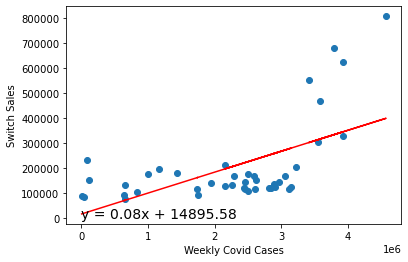

In [67]:
#Switch sales vs. tested patients
x_values = merged["Spec Tested"]
y_values = merged["Switch"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0.05,30),fontsize=14,color="black")

#Plot Confirmed Cases against Sales in a Scatterplot 
scatter = plt.scatter(x_values, y_values)
plt.xlabel("Weekly Covid Cases")
plt.ylabel("Switch Sales")
scatter
plt.savefig("scatter.png")

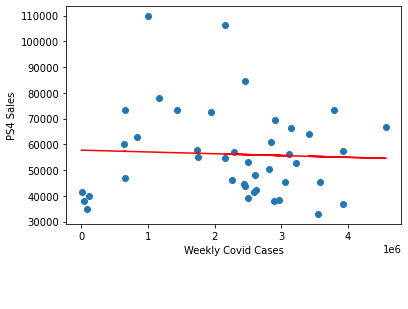

In [58]:
#PS4 sales vs tested patients
x_values = merged["Spec Tested"]
y_values = merged["PS4"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0.05,30),fontsize=14,color="black")

#Plot Confirmed Cases against Sales in a Scatterplot 
scatter = plt.scatter(x_values, y_values)
plt.xlabel("Weekly Covid Cases")
plt.ylabel("PS4 Sales")
scatter
plt.savefig("scatterps.png")

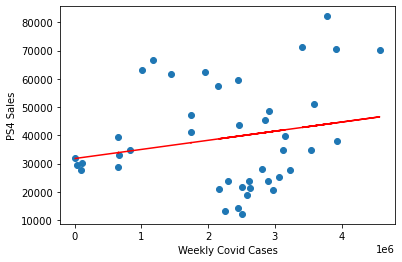

In [59]:
#Xbox 1 sales vs tested patients
x_values = merged["Spec Tested"]
y_values = merged["Xbox 1"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0.05,30),fontsize=14,color="black")

#Plot Confirmed Cases against Sales (Millions) in a Scatterplot 
scatter = plt.scatter(x_values, y_values)
plt.xlabel("Weekly Covid Cases")
plt.ylabel("PS4 Sales")
scatter
plt.savefig("scatterxb.png")